In [14]:
# Librerías a utilizar
#BUEN TRBAJO
#5.0
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.optimize import minimize
from scipy.optimize import curve_fit

In [5]:
# Lectura del dataframe
df=pd.read_csv("fit_curve.csv")
df

Unnamed: 0  x    y
0           0  0  0.0
1           1  1  1.3
2           2  2  2.6
3           3  3  3.9
4           4  4  5.2
5           5  5  6.5
6           6  6  5.8
7           7  7  5.1
8           8  8  4.4
9           9  9  3.7

Graficamos los datos para identificar la curva que podemos proponer para ajustarlos

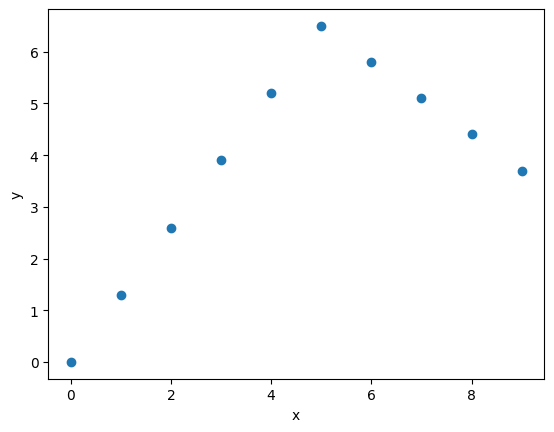

In [36]:
# Leemos las dos columnas del dataframe
x_data = np.array(df["x"])
y_data = np.array(df["y"])
plt.scatter(x_data, y_data)
plt.ylabel("y")
plt.xlabel("x")
plt.show()

De acuerdo con el comportamiento observado, comenzamos por proponer una parábola para ajustar los datos, de la forma:
$y = ax^2 + bx + c$.

Valores de los parámetros con minimize(chi2): [-0.18939412  2.15606222 -0.45454755]
Valores de los parámetros con curve_fit(): [-0.18939394  2.15606061 -0.45454545]
Errores asociados a estos parámetros: [0.0212353  0.19852451 0.38364847]
Chi cuadrado: 1.666666666684179


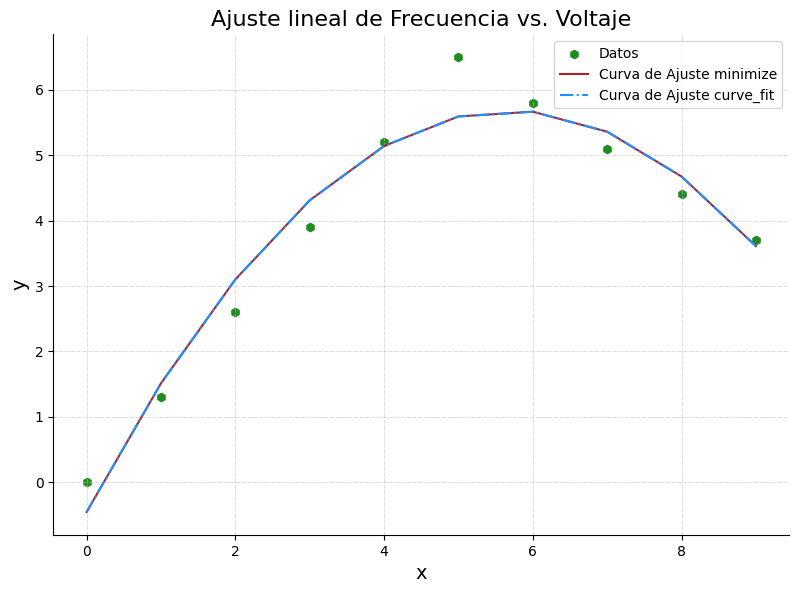

In [38]:
# Curva propuesta
def parabola(x, parameters):
    return parameters[0] * x**2 +  parameters[1] * x + parameters[2]

# Función para usar el método curve_fit de la librería Scipy
def parabola_curve_fit(x, a, b, c):
    return a * x**2 + b * x + c

# Función que define el cálculo de chi 2 para la parábola
def chi2_parabola(parameters):
    return np.sum(np.square(y_data - parabola(x_data, parameters)))

# Obtenemos los parámetros ajustados, minimizando el chi 2
result_parabola = minimize(chi2_parabola, (1, 1, 1))
fit_parameters_parabola = result_parabola.x

# Ahora llevamos el ajuste con curve_fit(), y obtenemos los parámetros y la matriz de covarianza correspondiente
parameters_opt, parameter_cov=curve_fit(parabola_curve_fit, x_data, y_data, p0=[1,1,1])

print("Valores de los parámetros con minimize(chi2): {}".format(fit_parameters_parabola))
print("Valores de los parámetros con curve_fit(): {}".format(parameters_opt))
print("Errores asociados a estos parámetros: {}".format(np.sqrt(np.diag(parameter_cov))))

print("Chi cuadrado: {}".format(chi2_parabola(fit_parameters_parabola)))

# Gráficamos los datos y las curvas de ajuste
plt.figure(figsize = (9.5,6.5)) # Para ajustar el tamaño de la gráfica
plt.scatter(x_data, y_data, label = "Datos", marker = "h", color = "forestgreen")
plt.plot(x_data, parabola(x_data, fit_parameters_parabola), label = "Curva de Ajuste minimize", color = "firebrick")
plt.plot(x_data, parabola_curve_fit(x_data, *parameters_opt), ls = "-.", label = "Curva de Ajuste curve_fit", color = "dodgerblue")
plt.grid(color='silver', linestyle='-.', linewidth=0.4) # Malla transparente 
plt.gca().spines['top'].set_visible(False) # Modificación de la figura
plt.gca().spines['right'].set_visible(False) # Modificación de la figura
plt.title('Ajuste lineal de Frecuencia vs. Voltaje', fontsize = 16) # Título
plt.xlabel('x', fontsize = 14) # label eje x
plt.ylabel('y', fontsize = 14) # label eje y
plt.legend()
plt.show()

Ahora llevamos a cabo el ajuste partiendo de la forma de una gaussiana.

In [39]:
# Curva gaussiana
def gaussian(x, parameters):
    return parameters[0] * np.exp(-(x - parameters[1])**2/(2 * parameters[2]**2))

# Función que define el cálculo de chi 2 para la gaussiana
def chi2_gaussian(parameters):
    return np.sum(np.square(y_data - gaussian(x_data, parameters)))

# Obtenemos los parámetros ajustados, minimizando el chi 2
result_gaussian = minimize(chi2_gaussian, (10,1,10))
fit_parameters_gaussian = result_gaussian.x

print("Valores de los parametros {}".format(fit_parameters_gaussian))
print("Chi cuadrado: {}".format(chi2_gaussian(fit_parameters_gaussian)))

# Gráficamos los datos y las curvas de ajuste
plt.figure(figsize = (9.5,6.5)) # Para ajustar el tamaño de la gráfica
plt.scatter(x_data, y_data, label = "Datos", marker = "h", color = "forestgreen")
plt.plot(x_data, gaussian(x_data, fit_parameters_gaussian), label = "Curva de Ajuste minimize", color = "firebrick")
plt.grid(color='silver', linestyle='-.', linewidth=0.4) # Malla transparente 
plt.gca().spines['top'].set_visible(False) # Modificación de la figura
plt.gca().spines['right'].set_visible(False) # Modificación de la figura
plt.title('Ajuste lineal de Frecuencia vs. Voltaje', fontsize = 16) # Título
plt.xlabel('x', fontsize = 14) # label eje x
plt.ylabel('y', fontsize = 14) # label eje y
plt.legend()
plt.show()

Valores de los parametros [6.19486317 5.74654914 2.78281471]
Chi cuadrado: 1.5817602776494735


Finalmente llevamos a cabo el ajuste haciendo uso de la forma de una gaussiana generalizada.

Valores de los parametros [-539.22826429  540.54165049    3.05240199   37.66408807]
Chi cuadrado: 1.670405233536524


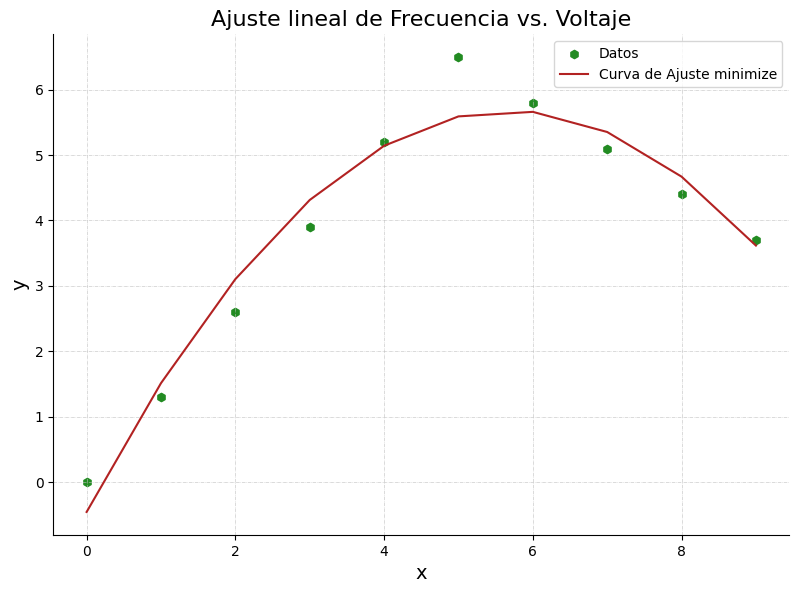

In [40]:
# Gaussiana generalizada
def general_gaussian(x, parameters):
    return x + parameters[0] + parameters[1] * np.exp(-(x - parameters[2])**2/(2 * parameters[3]**2))

# Función que define el cálculo de chi 2 para la gaussiana generalizada
def chi2_gaussian(parameters):
    return np.sum(np.square(y_data - general_gaussian(x_data, parameters)))

# Obtenemos los parámetros ajustados, minimizando el chi 2
result_general_gaussian = minimize(chi2_gaussian, (1,1,1,1))
fit_parameters_general_gaussian = result_general_gaussian.x
print("Valores de los parametros {}".format(fit_parameters_general_gaussian))
print("Chi cuadrado: {}".format(chi2_gaussian(fit_parameters_general_gaussian)))


# Gráficamos los datos y las curvas de ajuste
plt.figure(figsize = (9.5,6.5)) # Para ajustar el tamaño de la gráfica
plt.scatter(x_data, y_data, label = "Datos", marker = "h", color = "forestgreen")
plt.plot(x_data, general_gaussian(x_data, fit_parameters_general_gaussian), label = "Curva de Ajuste minimize", color = "firebrick")
plt.grid(color='silver', linestyle='-.', linewidth=0.4) # Malla transparente 
plt.gca().spines['top'].set_visible(False) # Modificación de la figura
plt.gca().spines['right'].set_visible(False) # Modificación de la figura
plt.title('Ajuste lineal de Frecuencia vs. Voltaje', fontsize = 16) # Título
plt.xlabel('x', fontsize = 14) # label eje x
plt.ylabel('y', fontsize = 14) # label eje y
plt.legend()
plt.show()